# Importing Library and Data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
passengers = pd.read_csv('/kaggle/input/titanic/train.csv')
passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Data Cleaning  and Data Visualization

Text(0.5, 1.0, 'Missing Values per column')

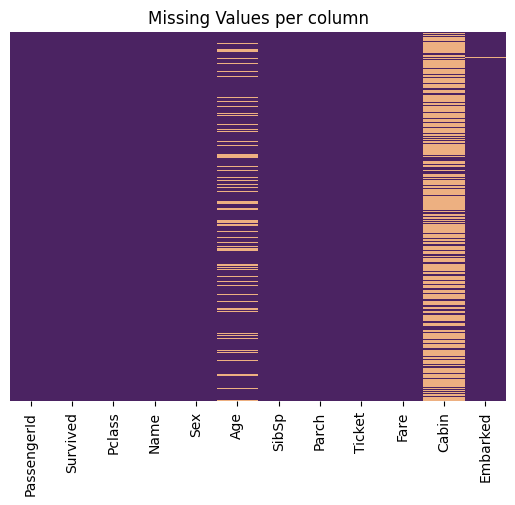

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(passengers.isnull(), yticklabels= False, cbar= False, cmap='flare_r')
plt.title("Missing Values per column")

The above visualization depicts the missing values for each column in the dataset.
Key Observations:
- Age column has approximately 20% data missing and can be replaced.
- Cabin column on the other hand has approximately 95% data missing. There is not enough information present to reproduce missing values. Thus, we decide to drop Cabin column.

In [4]:
passengers = passengers.drop(["Cabin"], axis=1)
passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


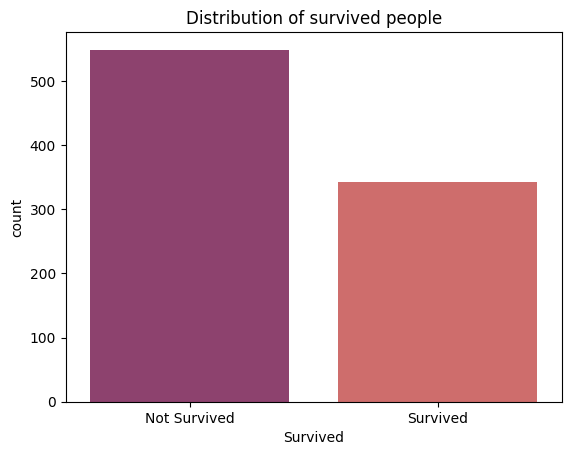

In [5]:
p = sns.countplot(x="Survived", data=passengers, palette="flare_r")
plt.title("Distribution of survived people")
labels = ["Not Survived", "Survived"]
p.set_xticklabels(labels)
plt.show()

Over 500 passengers did not survive, where as around 350 passengers survived. Thus we have sufficient data for either ends.

<Axes: xlabel='Survived', ylabel='count'>

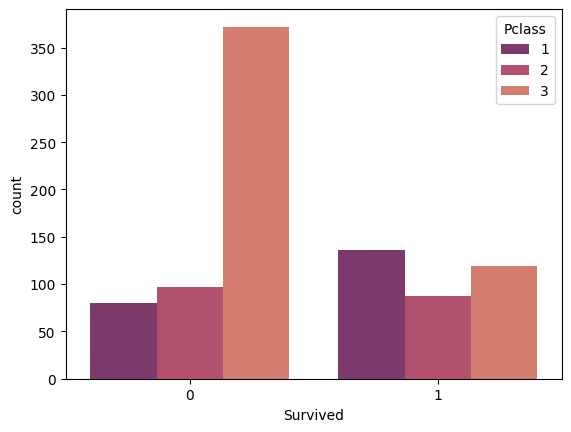

In [6]:
sns.countplot(x='Survived',hue='Pclass',data=passengers,palette='flare_r')

We can see the distribution of passengers that survived and that didnt from different classes. It is clear that majority of prople that did not survive were from Class 3 where as the most people that survived were from Class 1

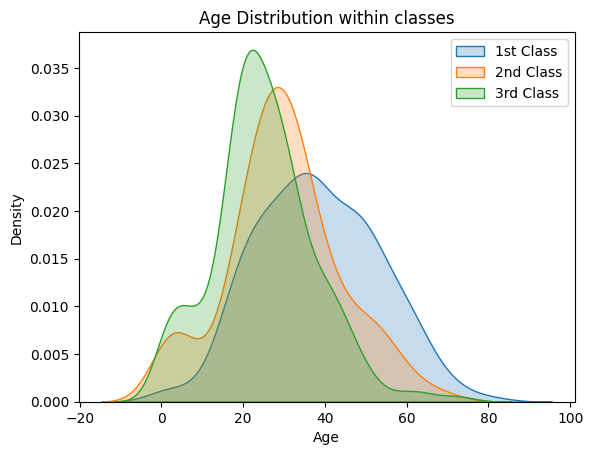

In [7]:
sns.kdeplot(data=passengers[passengers['Pclass'] == 1]['Age'], label='Class 1', fill=True)
sns.kdeplot(data=passengers[passengers['Pclass'] == 2]['Age'], label='Class 2', fill=True)
sns.kdeplot(data=passengers[passengers['Pclass'] == 3]['Age'], label='Class 3', fill=True)
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 

The above plot shows the distribution of Age as a density function over different passenger classes. Most of the passengers fit under the age group of 10 to 50

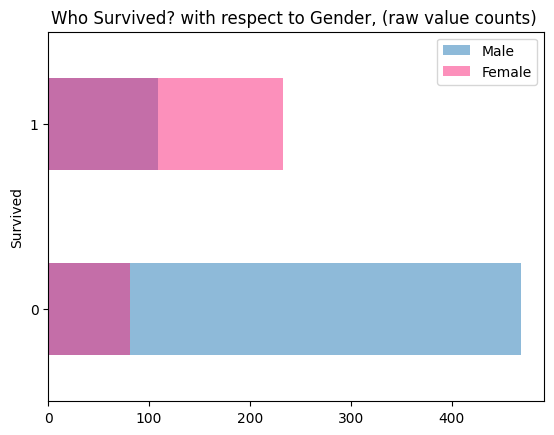

In [8]:
male_passengers = passengers.Survived[passengers.Sex == 'male'].value_counts().sort_index()
female_passengers = passengers.Survived[passengers.Sex == 'female'].value_counts().sort_index()
male_passengers.plot(kind='barh', label='Male', alpha = 0.5)
female_passengers.plot(kind='barh', color='#FA2379', label="Female", alpha = 0.5)
plt.title("Who Survived? with respect to Gender, (raw value counts) "); plt.legend(loc='best')

Here it’s clear that although more men died and survived in raw value counts, females had a greater survival rate proportionally (approx 25%), than men (approx 20%)

Let's bucket class 1 and class 2 as high class and class 3 as low class

In [9]:
fig = plt.figure(figsize=(18,6), dpi=1600)
p1 = fig.add_subplot(121)
f_high_class = passengers.Survived[passengers.Sex == 'female'][passengers.Pclass != 3].value_counts()
f_high_class.plot(kind='bar', label='female, highclass', color='pink')
p1.set_xticklabels(["Survived", "Not Survived"])
plt.legend(loc='best')
plt.title("Who survived with respect to gender and class?")

p2=fig.add_subplot(122, sharey=p1)
f_low_class = passengers.Survived[passengers.Sex == 'female'][passengers.Pclass == 3].value_counts()
f_low_class.plot(kind='bar', label='female, low class', color='brown')
p2.set_xticklabels(["Survived", "Not Survived"])
plt.legend(loc='best')

In [10]:
fig = plt.figure(figsize=(18,6), dpi=1600)
p1 = fig.add_subplot(121)
m_high_class = passengers.Survived[passengers.Sex == 'male'][passengers.Pclass != 3].value_counts()
m_high_class.plot(kind='bar', label='male, highclass', color='red')
p1.set_xticklabels(["Survived", "Not Survived"])
plt.legend(loc='best')
plt.title("Who survived with respect to gender and class?")

p2=fig.add_subplot(122, sharey=p1)
m_low_class = passengers.Survived[passengers.Sex == 'male'][passengers.Pclass == 3].value_counts()
m_low_class.plot(kind='bar', label='male, low class', color='grey')
p2.set_xticklabels(["Survived", "Not Survived"])
plt.legend(loc='best')

Now that we have a better understanding of data, we have a general idea of who survived and who didnt with respect to different classes and gender. 

With the deeper understanding, we can now attempt cleaning the data and reproducing some of the missing values. (Age Column)

In [11]:
plt.figure(figsize=(18,6), dpi = 1600)
sns.boxplot(x='Pclass', y='Age', data= passengers, palette='flare_r')

<Axes: xlabel='Pclass', ylabel='Age'>

The above plot shows a general trend of passengers' age with respective to their class. We can observe that the passengers in the higher classes tend to be older. We will use these average age values to impute based on Pclass for Age

In [12]:
def rep_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 36
        elif Pclass == 2:
            return 29
        else:
            return 25
    else:
        return Age
    
passengers['Age'] = passengers[["Age", "Pclass"]].apply(rep_age, axis=1)

In [13]:
passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


<Axes: >

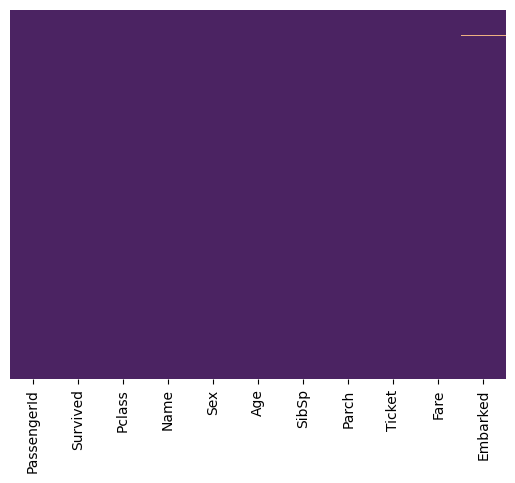

In [14]:
sns.heatmap(passengers.isnull(), yticklabels=False, cbar=False, cmap='flare_r')

We can see that majority of the Null values are reproduced and the ones for Embarked can be dropped as they are not significantly large.

In [15]:
passengers = passengers.dropna()
passengers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


**Women and children** were the first to board the titanic which means they are more likely to survive than men

In [16]:
women = passengers.loc[passengers.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7403846153846154


In [17]:
men = passengers.loc[passengers.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


The younger you are the more likely to survive

In [18]:
import plotly.express as px
fig = px.scatter_3d(passengers, x='PassengerId', y='Sex', z='Age',
                    color='Age')
fig.show()

In [19]:
for template in ["plotly"]:
    fig = px.scatter(passengers,
                     x="PassengerId", y="Age", color="Survived",
                     log_x=True, size_max=20,
                     template=template, title="Which Age Survived?")
    fig.show()

You have a higher chance of surviving if you have a first class ticket than having a second or third

<Axes: xlabel='Pclass', ylabel='Survived'>

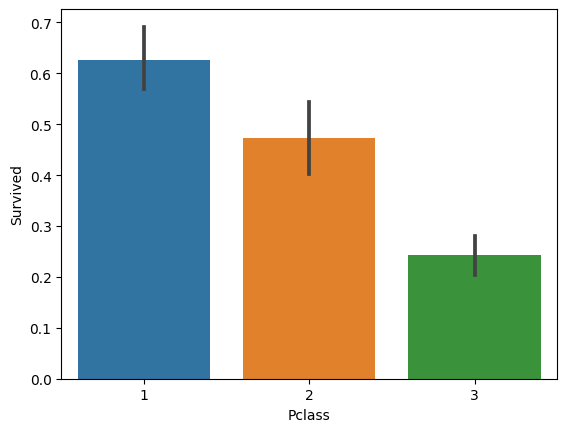

In [20]:
sns.barplot(x='Pclass', y='Survived', data=passengers)

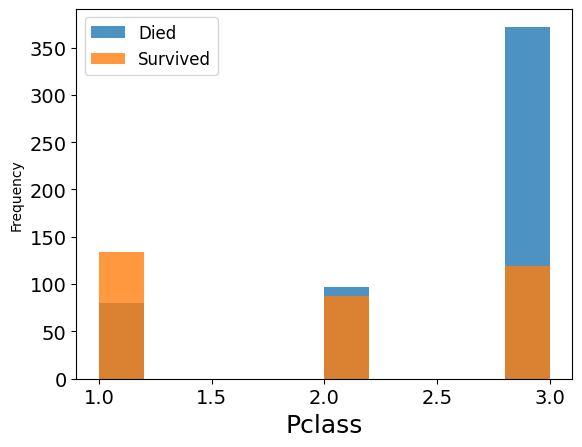

In [21]:
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)

plt.figure()
fig = passengers.groupby('Survived')['Pclass'].plot.hist(histtype= 'bar', alpha = 0.8)
plt.legend(('Died','Survived'), fontsize = 12)
plt.xlabel('Pclass', fontsize = 18)
plt.show()

Let's convert the categorical features.

In [22]:
embark = pd.get_dummies(passengers['Embarked'], drop_first=True)
sex = pd.get_dummies(passengers['Sex'], drop_first=True)

In [23]:
passengers.drop(['Embarked', 'Sex', 'Ticket', 'Name'], axis=1, inplace=True)
passengers = pd.concat([passengers, sex, embark], axis=1)
passengers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Age          889 non-null    float64
 4   SibSp        889 non-null    int64  
 5   Parch        889 non-null    int64  
 6   Fare         889 non-null    float64
 7   male         889 non-null    bool   
 8   Q            889 non-null    bool   
 9   S            889 non-null    bool   
dtypes: bool(3), float64(2), int64(5)
memory usage: 58.2 KB


Before we dive into fitting the data into a classifier, let's have a look at correlation table

In [24]:
cor = passengers.corr()
cor.style.background_gradient(cmap='flare_r')

# Model Designing and Training

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import classification_report
import sklearn.ensemble as ske
from sklearn.metrics import accuracy_score, classification_report

We need to predict a binary outcome i.e. we want to now whether a passenger with the given traits will survive(represented by 1) or not(represented by 0).

First we define a formula for logistic regression. The model is then instantiated and fitted before a summary of the model's performace is printed. 

In [26]:
X = passengers.drop('Survived', axis=1)
y = passengers['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [27]:
#model design
LRmodel = LogisticRegression()

#model train
LRmodel.fit(X_train, y_train)

#predictions
y_pred = LRmodel.predict(X_test)

#model evaluation
LRacc = accuracy_score(y_test, y_pred)
LRreport =  classification_report(y_test, y_pred)

print("Accuracy: ", LRacc)
print("Report: ", LRreport)

Accuracy:  0.797752808988764
Report:                precision    recall  f1-score   support

           0       0.83      0.84      0.84       109
           1       0.75      0.72      0.74        69

    accuracy                           0.80       178
   macro avg       0.79      0.78      0.79       178
weighted avg       0.80      0.80      0.80       178



/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Using XGBOOST Classifier

In [28]:
#model design
xgbclf_spec = XGBClassifier(objective='binary:logistic', random_state=123)
xgbclf_model = GridSearchCV(estimator=xgbclf_spec, param_grid=dict(learning_rate=[0.01, 0.05, 0.15, 0.3, 0.5]), scoring='roc_auc', refit=True, cv=5)

#model fit
xgbclf_model.fit(X_train, y_train)

#model predict
ypred = xgbclf_model.predict(X_test)

#model evaluation
XGBclfacc = accuracy_score(y_test, y_pred)
XGBclfreport =  classification_report(y_test, y_pred)

print("Accuracy: ", XGBclfacc)
print("Report: ", XGBclfreport)

Accuracy:  0.797752808988764
Report:                precision    recall  f1-score   support

           0       0.83      0.84      0.84       109
           1       0.75      0.72      0.74        69

    accuracy                           0.80       178
   macro avg       0.79      0.78      0.79       178
weighted avg       0.80      0.80      0.80       178



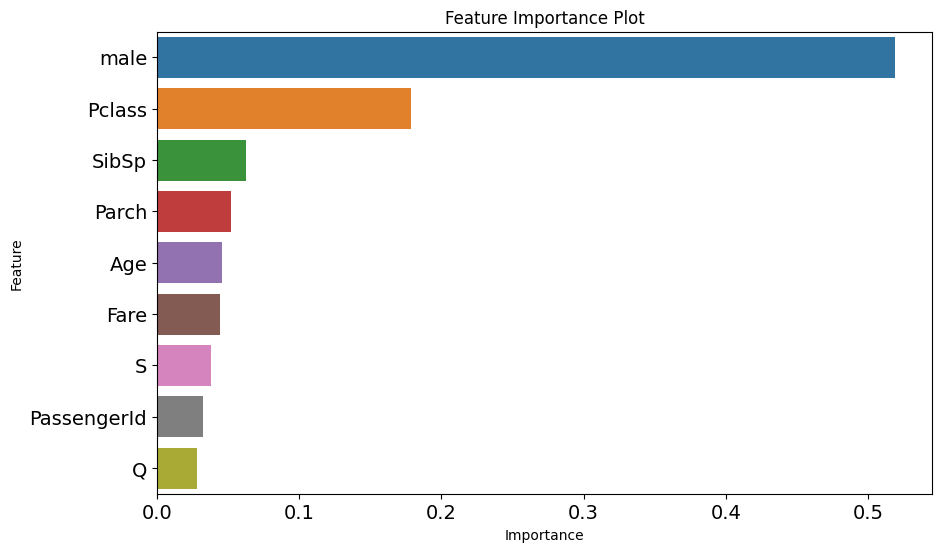

In [29]:
#feature importance
xgbclf_spec.fit(X_train, y_train)

f_imp = xgbclf_spec.feature_importances_

feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': f_imp})

sorted_feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=sorted_feature_importance_df)
plt.title('Feature Importance Plot')
plt.show()

In [30]:
from sklearn.ensemble import RandomForestClassifier

p = pd.read_csv('/kaggle/input/titanic/train.csv')
y = p["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(p[features])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#model design
model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=2)

#model fit
model.fit(X_train, y_train)

#model predictions
y_pred = model.predict(X_test)

RFclfacc = accuracy_score(y_test, y_pred)
RFclfreport =  classification_report(y_test, y_pred)

print("Accuracy: ", RFclfacc)
print("Report: ", RFclfreport)

Accuracy:  0.7932960893854749
Report:                precision    recall  f1-score   support

           0       0.80      0.87      0.83       105
           1       0.78      0.69      0.73        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [31]:
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')
X_pred = pd.get_dummies(test_df[features])

predictions = model.predict(X_pred)

output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)